In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

data = pd.read_csv("sequential_data/metrics/wally117_metrics.csv")
data.head()

,now,cpu.user,mem.used,load.cpucore,load.min1,load.min5,load.min15
0,2019-11-19 16:33:05 CEST,16.1,2917302272,8,0.31,0.82,1.22
1,2019-11-19 16:33:05 CEST,23.2,2925170688,8,0.31,0.82,1.22
2,2019-11-19 16:33:06 CEST,10.9,2923724800,8,0.31,0.82,1.22
3,2019-11-19 16:33:06 CEST,11.6,2924593152,8,0.31,0.82,1.22
4,2019-11-19 16:33:06 CEST,11.7,2924658688,8,0.31,0.82,1.22


In [9]:
data['now'].size

298251

In [10]:
data['now']

0         2019-11-19 16:33:05 CEST
1         2019-11-19 16:33:05 CEST
2         2019-11-19 16:33:06 CEST
3         2019-11-19 16:33:06 CEST
4         2019-11-19 16:33:06 CEST
                    ...           
298246    2019-11-21 11:01:39 CEST
298247    2019-11-21 11:01:39 CEST
298248    2019-11-21 11:01:40 CEST
298249    2019-11-21 11:01:41 CEST
298250    2019-11-21 11:01:41 CEST
Name: now, Length: 298251, dtype: object

In [11]:
from datetime import datetime
import matplotlib.dates as mdates

data['now'] = data['now'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S CEST'))

In [12]:
data['now'][0]

Timestamp('2019-11-19 16:33:05')

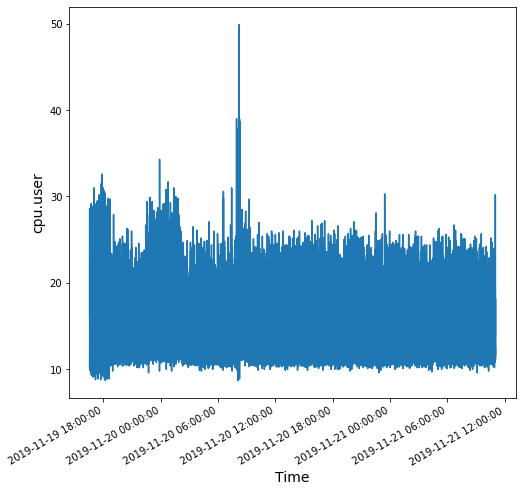

In [13]:
x = data['now']
y = data['cpu.user']

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel('Time', fontsize=14)
plt.ylabel('cpu.user', fontsize=14)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.show()

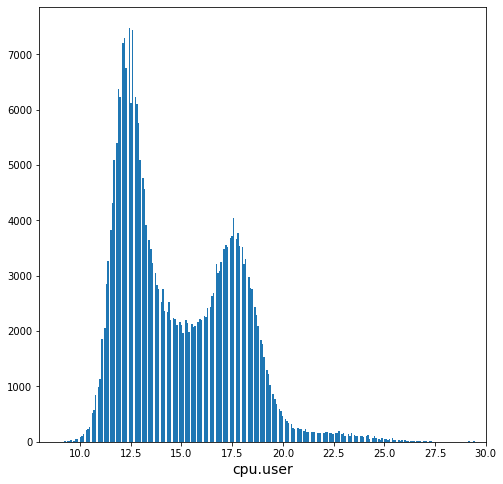

In [14]:
x = data['cpu.user']

plt.figure(figsize=(8, 8))
plt.hist(x, bins=int(math.sqrt(x.size)))
plt.xlabel('cpu.user', fontsize=14)
#plt.gca().set_ylim([0,1000])
plt.gca().set_xlim([8,30])

plt.show()

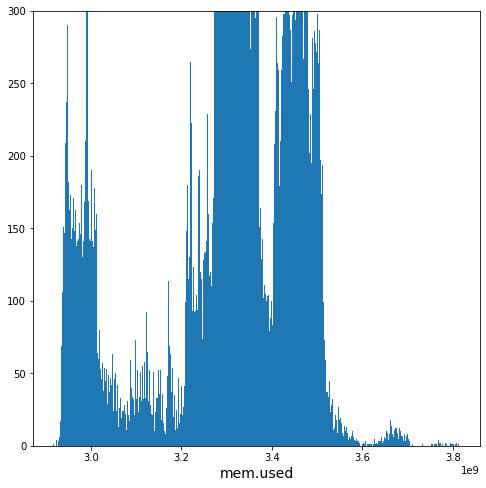

In [16]:
x = data['mem.used']

plt.figure(figsize=(8, 8))
plt.hist(x, bins=int(math.sqrt(x.size)))
plt.xlabel('mem.used', fontsize=14)
plt.gca().set_ylim([0, 300])

plt.show()

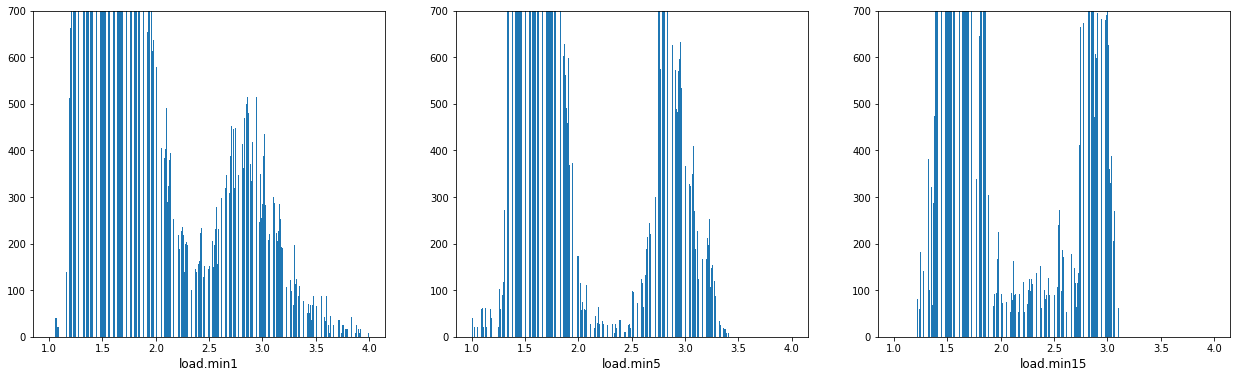

In [17]:
x1 = data['load.min1']
x2 = data['load.min5']
x3 = data['load.min15']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,6))

ax1.hist(x1, bins=int(math.sqrt(x1.size)), range=[1, 4])
ax1.set_xlabel('load.min1', fontsize=12)

ax2.hist(x2, bins=int(math.sqrt(x2.size)), range=[1, 4])
ax2.set_xlabel('load.min5', fontsize=12)

ax3.hist(x3, bins=int(math.sqrt(x3.size)), range=[1, 4])
ax3.set_xlabel('load.min15', fontsize=12)

plt.setp([ax1, ax2, ax3], ylim=(0, 700))

plt.subplots_adjust(right = 2.5)
plt.show()